In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<font size='5'>**Data Cleaning and Feature Engineering**</font>

In [2]:
data = pd.read_excel(r'D:\Programming\data science\corizo\minor project\1729258-1613615-Stock_Price_data_set_.xlsx')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [3]:
data.count()

Date         1009
Open         1009
High         1009
Low          1009
Close        1009
Adj Close    1009
Volume       1009
dtype: int64

In [4]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [5]:
data.isna().sum() #checking missing values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data.drop('Date',axis = 1, inplace = True)
data.head()

,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018


<AxesSubplot:>

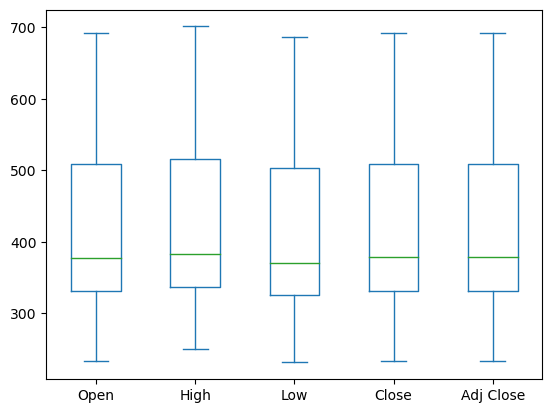

In [7]:
data[['Open','High','Low','Close','Adj Close']].plot(kind='box')

**Price Change:** This feature captures the change in stock price between two consecutive days. It can be useful as it provides information about the trend of the stock price. If the price change is positive over several days, it may indicate that the stock is trending upward, and vice versa

**Price Range:** This feature captures the difference between the highest and lowest price of a stock over a given period. It can be useful as it provides information about the volatility of the stock. If the price range is large, it may indicate that the stock is more volatile and potentially riskier.

In [8]:
data['Price_Change'] = data['Close'] - data['Open']
data['Price_Range'] = data['High'] - data['Low']
data.head()

,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,Price_Change,Price_Range
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018,-7.740005,17.869995
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018,18.020004,21.700012
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018,-2.019989,8.120025
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018,-16.979981,17.619995
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018,-4.380005,19.690002


**Moving Averages:** This feature calculates the average price of a stock over a given period of time. It can be useful as it provides information about the trend of the stock price over a longer time period.

Additionally, the "Adj Close" column is redundant as it contains the same information as the "Close" column , therefore it can be dropped.

In [9]:
short_period = 10
long_period = 30

#Calculate the short-term moving average
data['short_ma'] = data['Close'].rolling(short_period).mean()

# Calculate the long-term moving average
data['long_ma'] = data['Close'].rolling(long_period).mean()

# Dropping Null values
data.dropna(inplace = True)
data.head()

,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,Price_Change,Price_Range,short_ma,long_ma
29,315.799988,317.000000,307.339996,313.480011,313.480011,9925200,19,3,2018,-2.319977,9.660004,320.657001,291.264666
30,313.260010,319.500000,312.799988,317.500000,317.500000,5991900,20,3,2018,4.239990,6.700012,319.885001,293.372666
31,316.350006,319.399994,314.510010,316.480011,316.480011,5263900,21,3,2018,0.130005,4.889984,319.417001,295.064667
32,313.070007,314.119995,305.660004,306.700012,306.700012,8063300,22,3,2018,-6.369995,8.459991,318.387002,296.469334
33,307.410004,309.369995,300.359985,300.940002,300.940002,9529900,23,3,2018,-6.470002,9.010010,315.337003,298.164000


In [10]:
data = data.drop('Adj Close', axis=1)
data

,Open,High,Low,Close,Volume,Day,Month,Year,Price_Change,Price_Range,short_ma,long_ma
29,315.799988,317.000000,307.339996,313.480011,9925200,19,3,2018,-2.319977,9.660004,320.657001,291.264666
30,313.260010,319.500000,312.799988,317.500000,5991900,20,3,2018,4.239990,6.700012,319.885001,293.372666
31,316.350006,319.399994,314.510010,316.480011,5263900,21,3,2018,0.130005,4.889984,319.417001,295.064667
32,313.070007,314.119995,305.660004,306.700012,8063300,22,3,2018,-6.369995,8.459991,318.387002,296.469334
33,307.410004,309.369995,300.359985,300.940002,9529900,23,3,2018,-6.470002,9.010010,315.337003,298.164000
...,...,...,...,...,...,...,...,...,...,...,...,...
1004,401.970001,427.700012,398.200012,427.140015,20047500,31,1,2022,25.170014,29.500000,424.388000,527.323000
1005,432.959991,458.480011,425.540009,457.130005,22542300,1,2,2022,24.170014,32.940002,419.021002,523.003001
1006,448.250000,451.980011,426.480011,429.480011,14346000,2,2,2022,-18.769989,25.500000,410.383005,517.527668
1007,421.440002,429.260010,404.279999,405.600006,9905200,3,2,2022,-15.839996,24.980011,400.118005,510.883669


<font size='5'>**Building the Regression Model**</font>

In [11]:
#Normalization
temp_col = data.columns.to_list()
print(temp_col, '\n')

new_col = temp_col[: 4] + temp_col[5: ]
new_col.append(temp_col[4])
print(new_col, '\n')

data = data.reindex(columns = new_col)
data.head()

['Open', 'High', 'Low', 'Close', 'Volume', 'Day', 'Month', 'Year', 'Price_Change', 'Price_Range', 'short_ma', 'long_ma'] 

['Open', 'High', 'Low', 'Close', 'Day', 'Month', 'Year', 'Price_Change', 'Price_Range', 'short_ma', 'long_ma', 'Volume'] 



,Open,High,Low,Close,Day,Month,Year,Price_Change,Price_Range,short_ma,long_ma,Volume
29,315.799988,317.000000,307.339996,313.480011,19,3,2018,-2.319977,9.660004,320.657001,291.264666,9925200
30,313.260010,319.500000,312.799988,317.500000,20,3,2018,4.239990,6.700012,319.885001,293.372666,5991900
31,316.350006,319.399994,314.510010,316.480011,21,3,2018,0.130005,4.889984,319.417001,295.064667,5263900
32,313.070007,314.119995,305.660004,306.700012,22,3,2018,-6.369995,8.459991,318.387002,296.469334,8063300
33,307.410004,309.369995,300.359985,300.940002,23,3,2018,-6.470002,9.010010,315.337003,298.164000,9529900


In [12]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



In [13]:
data = scaler.fit_transform(data)
x = data[:, : -1]          # fetch all the rows and columns excluding the last column
y = data[:, -1] 

In [14]:
x_train, x_test, y_train, y_test = tts (x, y, test_size = 0.2, random_state = 80)
print('size of the training input:',x_train.shape)
print('size of the training output:',y_train.shape)
print('size of the testing input:',x_test.shape)
print('size of the testing output:',y_test.shape)

size of the training input: (784, 11)
size of the training output: (784,)
size of the testing input: (196, 11)
size of the testing output: (196,)


In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

def metrics(y_true, y_pred):
    y = mse(y_true, y_pred)
    return y

In [17]:
y_pred = model.predict(x_test)

In [18]:
metrics(y_test,y_pred)

0.7906061340929174